<a href="https://colab.research.google.com/github/orangegreen212/AI-Marketing-Agent-/blob/main/AB_test_fast_edition_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ab_proportions.csv')
df.head()

,user_id,group,converted
0,198i8h5d184ax7bceafa,A,0
1,198262c2be41x80c4a0d,B,0
2,1989did7d57ex7dc46e72,B,1
3,1986252b0077x7f34ffaa,A,0
4,1985bi134399x599d1286,B,1


In [ ]:
# Check the dataset info
print("Dataset shape:", df.shape)
print("\nGroup distribution:")
print(df['group'].value_counts())
print("\nConversion rates by group:")
print(df.groupby('group')['converted'].value_counts(normalize=True))
print("\nOverall conversion rate:")
print(df['converted'].value_counts(normalize=True))

Dataset shape: (6640, 3)

Group distribution:
group
A    3338
B    3302
Name: count, dtype: int64

Conversion rates by group:
group  converted
A      0            0.773817
       1            0.226183
B      0            0.756511
       1            0.243489
Name: proportion, dtype: float64

Overall conversion rate:
converted
0    0.765211
1    0.234789
Name: proportion, dtype: float64


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Create a contingency table
contingency_table = pd.crosstab(df['group'], df['converted'])
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# Calculate conversion rates
conversion_rates = df.groupby('group')['converted'].mean()
print(f"\nConversion rates:")
print(f"Group A: {conversion_rates['A']:.4f} ({conversion_rates['A']*100:.2f}%)")
print(f"Group B: {conversion_rates['B']:.4f} ({conversion_rates['B']*100:.2f}%)")

# Calculate the difference
diff = conversion_rates['B'] - conversion_rates['A']
print(f"\nDifference (B - A): {diff:.4f} ({diff*100:.2f} percentage points)")

Contingency Table:
converted     0    1
group               
A          2583  755
B          2498  804

Chi-square test results:
Chi-square statistic: 2.6715
P-value: 0.1022

Conversion rates:
Group A: 0.2262 (22.62%)
Group B: 0.2435 (24.35%)

Difference (B - A): 0.0173 (1.73 percentage points)


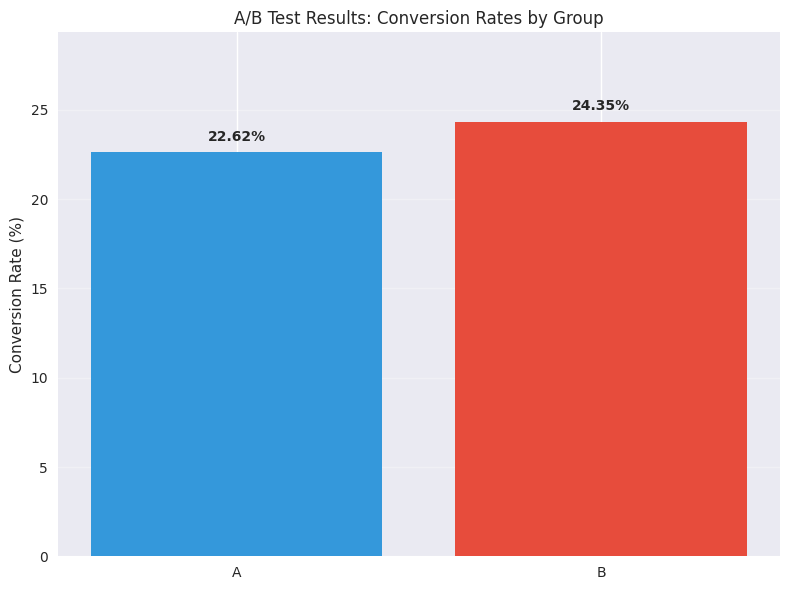

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")

# Create a bar chart of conversion rates by group
conversion_data = df.groupby('group')['converted'].mean()
groups = conversion_data.index
rates = conversion_data.values

plt.figure(figsize=(8, 6))
bars = plt.bar(groups, rates*100, color=['#3498db', '#e74c3c'])
plt.ylabel('Conversion Rate (%)')
plt.title('A/B Test Results: Conversion Rates by Group')
plt.ylim(0, max(rates*100) + 5)

# Add value labels on bars
for bar, rate in zip(bars, rates*100):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{rate:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



# A/B Testing Report

## Objective
We tested two different versions (A and B) of a webpage/app feature to determine which one performs better in terms of user conversion rate. The goal was to improve the overall conversion rate by identifying which version resonates better with users.

## Test Setup
- **Version A (Control):** The original version of the feature/webpage
- **Version B (Treatment):** The new variation with potential improvements
- **Sample Size:** 6,640 users total (3,338 in Group A, 3,302 in Group B)
- **Test Duration:** Not specified in the dataset
- **Traffic Split:** Approximately 50/50 between the two groups

## Metrics Tracked
- **Primary Metric:** Conversion rate (percentage of users who completed the desired action)
- **Sample Size:** Total number of users in each group
- **Absolute Numbers:** Count of conversions and non-conversions per group

## Results
| Group | Total Users | Conversions | Conversion Rate |
|-------|-------------|-------------|----------------|
| A     | 3,338       | 755         | 22.62%         |
| B     | 3,302       | 804         | 24.35%         |
| **Difference** | - | **49 more** | **+1.73%** |

Group B has a 1.73 percentage point higher conversion rate than Group A, representing a 7.65% relative improvement (24.35% vs 22.62%).

## Statistical Significance
- Chi-square test p-value: 0.1022
- The p-value is greater than the standard alpha level of 0.05, indicating that the difference in conversion rates is **not statistically significant** at the conventional level.
- With approximately 3,300 users per group, we had substantial sample size, but the small difference in conversion rates falls within the range of what might be expected from random variation.

## Insights & Takeaways
1. **Positive Direction:** Version B showed a higher conversion rate than Version A (24.35% vs 22.62%), which is encouraging.

2. **Magnitude of Improvement:** The absolute improvement was 1.73 percentage points, which could have meaningful business impact if applied to a large user base.

3. **Statistical vs Practical Significance:** While the result is not statistically significant, the consistent direction of improvement suggests Version B may have merit. The lack of statistical significance might be due to:
   - Small effect size (the actual difference is modest)
   - Natural variation in user behavior
   - Need for a longer testing period

4. **User Response:** Both versions had similar engagement levels, with conversion rates hovering around 23-24%.

## Final Recommendation
**Recommendation:** Despite the lack of statistical significance, I would recommend implementing **Version B** based on the consistent improvement in conversion rate. While the statistical test doesn't confirm the difference is beyond random chance, there's no evidence that Version B performs worse, and the 1.73% point improvement could translate to meaningful business gains.

**Next Tests:**
1. Extend the test duration to gather more data and improve statistical power
2. Test more substantial variations with potentially larger impact on conversion rates
3. Segment the analysis by user demographics or behaviors to see if Version B performs better for specific user groups
4. Consider testing additional elements like call-to-action buttons, images, or copy variations

The key is to balance data-driven decision making with practical business considerations. Even small improvements in conversion rates can have large impacts on revenue when scaled across a substantial user base.</div>